In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
dataset = pd.read_csv('2weekchunk.csv', low_memory=False)

In [7]:
import math
def convert(cell):
    if pd.isnull(cell):
        return [],[]
    else:
        d = cell[1:-1].split('), (')
        d[0] = d[0][1:]
        d[-1] = d[-1][1:]
        vector = []
        labels = []
        for tup in d:
            vector.append(tup.split(", ")[1])
            labels.append(tup.split(", ")[0])
        exp = vector[6]
        format_str = '%m/%d/%Y'
        exp = exp[1:-1]
        exp = datetime.datetime.strptime(exp, format_str)

        return vector, labels

In [4]:
avg_vols = []
empty_rows = dataset.apply(lambda x: x.count(), axis=1)
i=0
for index, row in dataset.iterrows():
    ivs = []
    row_vol = 0
    for cell in row:
        vals, labels = convert(cell)
        if len(labels)>0:
            row_vol += int(vals[labels.index("'Volume'")])
            ivs.append(float(vals[labels.index("'IV'")]))
        else:
            break
    avg_vols.append(row_vol/empty_rows[i])
    i += 1

NameError: name 'dataset' is not defined

In [53]:
np.argsort(avg_vols)[:1]
zs = filter(lambda x:x == 0.0, avg_vols)
len(list(zs))

1087

In [20]:
dataset.iloc[0,0]

"[('UnderlyingSymbol', 'SPY'), ('UnderlyingPrice', 324.12), ('Exchange', '*'), ('OptionSymbol', 'SPY200214C00270000'), ('OptionExt', nan), ('Type', 'call'), ('Expiration', '02/14/2020'), ('DataDate', Timestamp('2020-02-03 00:00:00')), ('Strike', 270.0), ('Last', 54.5), ('Bid', 53.97), ('Ask', 54.21), ('Volume', 0), ('OpenInterest', 321), ('IV', 0.241), ('Delta', 0.9998), ('Gamma', 0.0), ('Theta', -1.936), ('Vega', 0.0008), ('Unnamed: 0', 0), ('symbol', 'SPY'), ('iv30call', 0.1616), ('iv30put', 0.1649), ('iv30mean', 0.1632), ('callvol', 851840), ('putvol', 1828476), ('totalvol', 2680316), ('calloi', 6418694), ('putoi', 10882029), ('comment', nan), ('open', 323.35), ('high', 326.16), ('low', 323.22), ('close', 324.12), ('volume', 63008919), ('adjustedclose', 324.12)]"

In [5]:
long_ds = pd.read_csv('daily_spy_track.csv', low_memory=False, index_col=0)

In [6]:
long_ds = long_ds.transpose()
long_ds.head()

,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,...,2021-02-12,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26
SPY200203C00270000,"[('UnderlyingSymbol', 'SPY'), ('UnderlyingPric...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPY200203P00270000,"[('UnderlyingSymbol', 'SPY'), ('UnderlyingPric...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPY200203C00275000,"[('UnderlyingSymbol', 'SPY'), ('UnderlyingPric...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPY200203P00275000,"[('UnderlyingSymbol', 'SPY'), ('UnderlyingPric...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPY200203C00280000,"[('UnderlyingSymbol', 'SPY'), ('UnderlyingPric...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
long_ds = long_ds.dropna()

In [8]:

avg_vols = []
empty_rows = long_ds.apply(lambda x: x.count(), axis=1)
i=0
for index, row in long_ds.iterrows():
    ivs = []
    row_vol = 0
    for cell in row:
        vals, labels = convert(cell)
        if len(labels)>0:
            row_vol += int(vals[labels.index("'Volume'")])
            ivs.append(float(vals[labels.index("'IV'")]))
        else:
            break
    avg_vols.append(row_vol/empty_rows[i])
    i += 1

In [9]:
indices = np.argsort(avg_vols)[-30:]

In [10]:
np.take(avg_vols, indices)

array([ 444.3197026 ,  473.94423792,  481.11152416,  482.66542751,
        491.26394052,  498.71375465,  511.18959108,  656.66171004,
        684.63568773,  707.28624535,  730.55762082,  770.23420074,
        782.2527881 ,  797.89219331,  827.3197026 ,  881.65799257,
        921.61710037,  940.68401487,  994.94795539,  996.5204461 ,
       1005.93680297, 1008.4535316 , 1095.47583643, 1105.57992565,
       1142.49070632, 1232.35315985, 1316.07434944, 1413.18959108,
       2097.03345725, 2135.46096654])

In [11]:
long_ds_f = long_ds.iloc[indices]

No handles with labels found to put in legend.


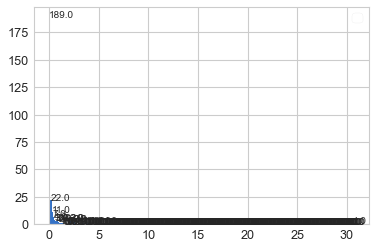

No handles with labels found to put in legend.


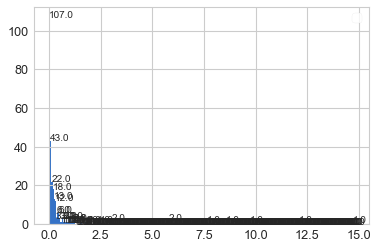

No handles with labels found to put in legend.


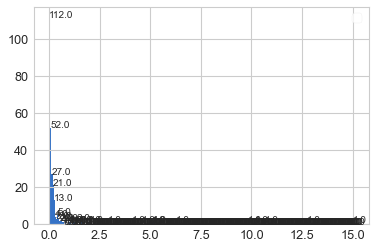

No handles with labels found to put in legend.


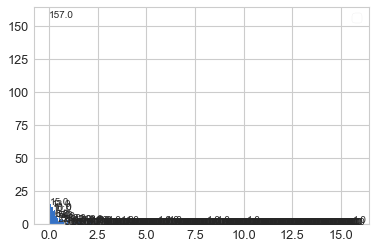

No handles with labels found to put in legend.


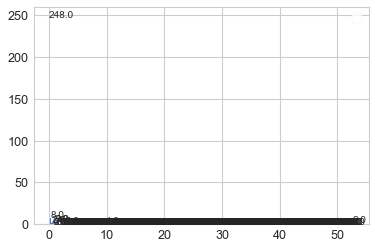

No handles with labels found to put in legend.


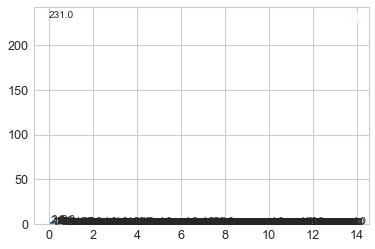

No handles with labels found to put in legend.


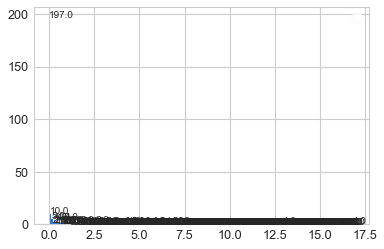

No handles with labels found to put in legend.


KeyboardInterrupt: 

In [96]:

empty_rows = long_ds_f.apply(lambda x: x.count(), axis=1)
i=0
avg_ivs = []
for index, row in long_ds_f.iterrows():
    ivs = []
    bids = []
    asks = []
    lasts =[]
    vols = []
    for cell in row:
        vals, labels = convert(cell)
        if len(labels)>0:
            bids.append(float(vals[labels.index("'Bid'")]))
            asks.append(float(vals[labels.index("'Ask'")]))
            ivs.append(float(vals[labels.index("'IV'")])*100)
            lasts.append(float(vals[labels.index("'Last'")]))
            vols.append(float(vals[labels.index("'Volume'")])/1000)
        else:
            break
    avg_ivs.append(sum(ivs)/len(ivs))
    # plt.plot(ivs, label='IV')
    # plt.plot(bids, label='Bid')
    # plt.plot(asks, label='Ask')
    # plt.plot(lasts, label='Last')
    i += 1

In [12]:
import mibian
import yfinance as yf
import ast

# vals, labs = convert(long_ds_f.iloc[0,0])
# iv = avg_ivs[0]
# cprice = vals[float(labs.index("'Last'"))*100]
# uprice = vals[float(labs.index("'UnderlyingPrice'"))*100]

bs_arr = []
me_arr = []
gk_arr = []
prems = []

ois = []
opt_vols = []
ivs = []
callois = []
putois = []
stock_vols = []
ocd = []
ohd = []
old = []
chd = []
cld = []
ttms = []
uprices = []

for item in long_ds_f.iloc[0]:
    vals, labs = convert(item)
    iv = float(vals[labs.index("'IV'")])
    uprice = float(vals[labs.index("'UnderlyingPrice'")])
    prem = float(vals[labs.index("'Last'")])*100
    strike = float(vals[labs.index("'Strike'")])
    date = vals[labs.index("'Expiration'")][1:-1]
    format_str = '%m/%d/%Y' # The format
    datetime_obj = datetime.datetime.strptime(date, format_str)
    datadate = vals[labs.index("'DataDate'")][11:-11]
    datadate = datetime.datetime.strptime(datadate, "%Y-%m-%d")
    ttm = datetime_obj - datadate
    ttm = ttm.days
    bs = mibian.BS([uprice, strike, 0.25, ttm], volatility=iv*100)
    me = mibian.Me([uprice, strike, 0.25, 1, ttm], volatility=iv*100)
    gk = mibian.GK([uprice, strike, 0.25, 2, ttm], volatility=iv*100)
    bs_arr.append(bs.putPrice*100)
    gk_arr.append(gk.putPrice*100)
    me_arr.append(me.putPrice*100)

    ois.append(float(vals[labs.index("'OpenInterest'")]))
    opt_vols.append(float(vals[labs.index("'Volume'")]))
    ivs.append(float(vals[labs.index("'IV'")]))
    callois.append(float(vals[labs.index("'calloi'")]))
    putois.append(float(vals[labs.index("'putoi'")]))
    stock_vols.append(float(vals[labs.index("'volume'")]))
    close = float(vals[labs.index("'close'")])
    openn = float(vals[labs.index("'open'")])
    high = float(vals[labs.index("'high'")])
    low = float(vals[labs.index("'low'")])
    ttms.append(ttm)
    uprices.append(uprice)

    ocd.append((openn-close)/openn)
    ohd.append((openn-high)/openn)
    old.append((openn-low)/openn)
    chd.append((close-high)/close)
    cld.append((close-low)/close)
    prems.append(prem)

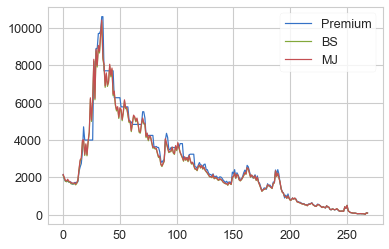

In [13]:
plt.plot(prems, label='Premium')
plt.plot(bs_arr, label='BS')
plt.plot(me_arr, label='MJ')
plt.legend()
plt.show()

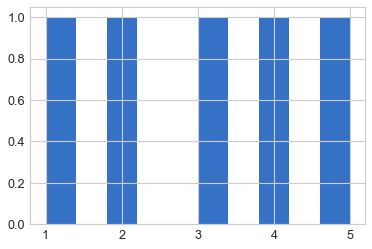

In [88]:
a = [1, 2, 3, 4, 5]
plt.hist(a)
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
print(math.pow(mean_squared_error(prems, bs_arr),0.5))
print(math.pow(mean_squared_error(prems, me_arr),0.5))

370.1675301552449
356.303993197219


In [10]:
# long_ds_f.to_csv('ldsf.csv')
long_ds_f=pd.read_csv("ldsf.csv", index_col=0)

In [14]:
predictions = [15.742826526241899, 22.011584817772032, 23.323083826553358, 20.609233977823052, 18.543750624358196, 16.26384997610218, 15.5123975297997, 14.931934109077602, 15.064153750094817, 14.470584517297254, 15.00155164183532, 16.253980265919267, 21.02620267122836, 26.17790469255874, 27.636967954628744, 35.80648871341083, 36.94539113668449, 30.561227955909487, 35.17371407614482, 27.762821591073475, 33.87492047582788, 38.37671627391313, 55.405263233694626, 47.83830448949345, 60.44514486720266, 78.90943513251219, 61.70552012546517, 86.78500236009009, 72.3227946273048, 82.85006419622565, 86.39549270514343, 97.44355788902098, 100.65348245279682, 81.15362143831632, 77.93768039894385, 63.10212250126742, 69.33434585787847, 63.98257413678533, 69.41996697061529, 79.34251528373463, 73.2351602374103, 75.19862465851816, 59.19386155432451, 58.72728409352098, 52.781122127496275, 52.989037374592385, 55.9443760917126, 50.601235356853095, 54.26734113954754, 53.17327871468723, 48.66611683563784, 51.94585419978401, 57.69048799969252, 54.34415839594615, 54.795814404658444, 52.375664805387345, 49.540886923940036, 49.59371316437145, 43.34614683391169, 43.7479478460246, 48.60800519583475, 50.37823959685835, 48.70584747950821, 49.561227940069244, 46.70351758934402, 43.579897281460546, 42.719926116369976, 45.65806885020115, 48.81562656557969, 46.812993599827195, 45.59492324499385, 39.64459163383364, 42.0174268489817, 38.188208025766386, 39.344267547373136, 38.54093186190289, 36.84152395556714, 34.37267931370093, 34.399151938578825, 33.344051832303705, 32.672495001297506, 31.269233679381756, 29.86082474173645, 29.5737017100339, 25.326716158080046, 23.479202214229957, 24.512174528557097, 26.275316987109335, 36.78463418781149, 35.145733391270596, 35.23984143198325, 32.57046910420166, 32.424722530673506, 32.54138391118633, 34.0246303085172, 32.89099364800393, 32.53666184214197, 35.333935742175925, 33.06031255152442, 37.04216626983896, 33.957029979196676, 31.05727137414513, 30.412887415378947, 29.797267318424417, 26.900345063379746, 27.925864726457746, 27.40493345492365, 28.916980538437173, 27.296357371539216, 28.821433911876795, 26.58106332755625, 26.52877768525721, 27.125461283469804, 26.411578970627687, 25.09342584965586, 23.63009614582336, 21.840312047680783, 23.499951326966823, 24.724114776385164, 24.06414057305946, 24.947480572575586, 23.07013955204971, 23.683146288867448, 22.679089575866556, 21.93636793018686, 21.170304566201054, 20.497334337218348, 19.484249247965266, 19.176964457045017, 18.645261993933318, 19.814421760333204, 18.210879928517627, 18.82431423302951, 18.690854471133946, 18.258095406375148, 18.111721848529882, 18.22753154057493, 17.549565437686667, 17.25818603856098, 16.04409560137792, 15.592040965841562, 14.922132542512855, 14.877491227858386, 14.969116807084617, 15.53672230731354, 14.723864717971367, 14.300303959956878, 18.676639927865253, 20.923876437597357, 24.32644392222599, 20.92943760047787, 21.234136935768817, 20.4361254344293, 18.167269890581565, 17.025250604910866, 17.103760364973283, 18.389895700394987, 20.793442013203162, 22.303708030656765, 20.183925901804002, 23.350809887964772, 23.529590750891373, 21.349215793351703, 18.921929769383098, 19.70826705783088, 19.307223769202295, 18.716182169307814, 19.90683306449492, 17.743741268866174, 19.56731742806076, 17.4282227099948, 16.131006192310934, 14.68694037025169, 12.30822694231685, 12.170539848240509, 12.849604637928977, 13.14276884955153, 13.086028626651668, 14.663718366249824, 14.72115506191011, 15.179667413580603, 14.707925425270432, 13.726846155063015, 15.506081022730442, 15.720841759346285, 20.970518754486363, 19.705435134266935, 22.72729764041992, 20.262039272626993, 17.61185253091972, 14.123513799644712, 11.781731543148666, 10.938530101347354, 9.720730096967529, 9.49654763975478, 8.541550738505435, 9.150961386449751, 7.815623392999981, 7.083422335590498, 7.527468243344217, 8.822372404751732, 8.3663763797923, 8.826825082278333, 7.9352626973632425, 6.596955309130408, 6.575248153867193, 6.2956029834728895, 6.235028396972126, 5.510940363258243, 5.073138547913679, 5.312376067592837, 4.911981548410374, 4.978499963920747, 4.856759768260503, 5.549580579379608, 5.240222486594348, 5.383338638279042, 5.514488239795298, 4.892961402904888, 5.106342303925651, 4.828874555529701, 4.996640694756991, 4.882344563658862, 4.428378245687803, 4.997317248734468, 4.874144915190492, 3.888871536058538, 3.593419438696216, 3.5771375998764725, 3.660984428906282, 4.0816594805839586, 3.70423625485094, 3.878533573929573, 3.182315034645285, 2.978084599668719, 2.785075142249397, 2.639397844940909, 2.7921810151621145, 2.8619191027846327, 3.002846529228421, 2.463950343757496, 2.0435630717666413, 1.9988199677461083, 2.0466710679883207, 1.6587049031298733, 1.6545393156147767, 2.762704886233955, 2.380818344021421, 4.690705575257262, 2.9043365850139367, 3.1614650791034933, 1.9030052793824908, 1.1551943707186076, 0.6460167367150191, 0.6081059776920128, 0.7248564503773238, 0.7518449848918145, 0.717738311787171, 0.5246428418050115, 0.42263092595747587, 0.5573926461900331, 0.6290943230786805, 0.6243219030540814, 0.5016027703287662, 0.3736952032044325, 0.6275000252001508, 0.543756928446598]

In [19]:
svm_labels = np.array(predictions) - np.array(prems[2:])

In [15]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(SVR(C=1.0, epsilon=0.2))
predictions = np.array(predictions)*100
predictions = predictions.reshape(-1,1)
prems = np.array(prems)

# regr.fit(predictions, prems[2:])

In [46]:
nps = regr.predict(predictions.reshape(-1,1))
print(math.pow(mean_squared_error(nps.reshape(-1,1), prems[2:].reshape(-1,1)), 0.5))

2276.0039640588457


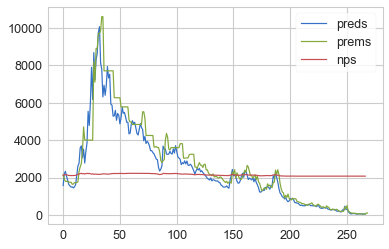

In [50]:
plt.plot(predictions, label='preds')
plt.plot(prems, label='prems')
plt.plot(nps, label='nps')
plt.legend()
plt.show()

In [51]:
# ois = []
# opt_vols = []
# ivs = []
# callois = []
# putois = []
# stock_vols = []
# ocd = []
# ohd = []
# old = []
# chd = []
# cld = []

In [17]:
svm_x = np.concatenate((np.array(ttms[2:]).reshape(-1,1), np.array(uprices[2:]).reshape(-1,1)), axis=1)

In [18]:
svm_y = np.array(predictions - prems[2:].reshape(-1,1))

In [19]:
regr.fit(svm_x, svm_y)

C:\Users\Qurram zaheer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('svr', SVR(epsilon=0.2))])

In [20]:
nps = regr.predict(svm_x)

In [21]:
print(math.pow(mean_squared_error(nps, svm_y), 0.5))
print(math.pow(mean_squared_error(nps, prems[2:]), 0.5))
print(math.pow(mean_squared_error(predictions, prems[2:]), 0.5))


NameError: name 'mean_squared_error' is not defined

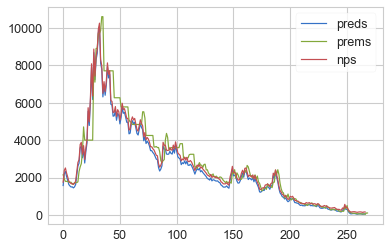

In [22]:
nps = predictions - nps.reshape(-1,1)
plt.plot(predictions, label='preds')
plt.plot(prems, label='prems')
plt.plot(nps, label='nps')
plt.legend()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(np.concatenate((svm_x, svm_y), axis=1), test_size=0.2)

In [26]:

regr.fit(train[:,:2], train[:,2].reshape(-1,1))


C:\Users\Qurram zaheer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('svr', SVR(epsilon=0.2))])

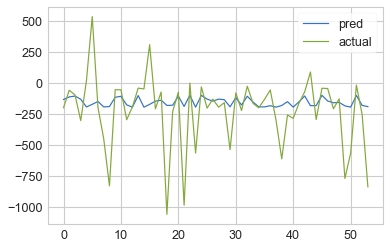

In [30]:
blah = regr.predict(test[:,:2])
plt.plot(blah, label='pred')
plt.plot(test[:,2], label='actual')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import r2_score

print(r2_score(blah, test[:,1]))

-198.28861175643954


In [222]:
print(r2_score(nps, prems[2:]))

0.9658526471616345


In [37]:
print('hi')

hi
